In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.optimize import curve_fit

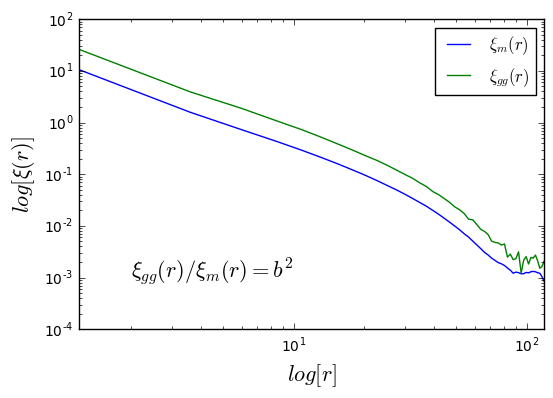

In [254]:
xi_m = np.loadtxt('/home/icgguest/Desktop/CF_DM_Dense.txt')
xi_m = xi_m[:,0:2]
xi_g = np.loadtxt('/home/icgguest/Desktop/CF_LOWZ_mockgals.txt')
xi_g = xi_g[:,0:2]
plt.plot(xi_m[:,0], xi_m[:,1], label = r'$\xi_{m}(r)$')
plt.plot(xi_g[:,0], xi_g[:,1], label = r'$\xi_{gg}(r)$')
plt.xlim(xi_m[:,0].min(), xi_m[:,0].max())
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$log[r]$', size = '16')
plt.ylabel(r'$log[\xi(r)]$', size= '16')
# plt.annotate(r'$ \xi_{gg}(r)/\xi_{m}(r)=  %0.3f \pm %0.3f$' %(popt, perr), xy = (2, 10**-2), size = '16')
plt.annotate(r'$ \xi_{gg}(r)/\xi_{m}(r) =b^2$', xy = (2, 10**-3), size = '16')
plt.legend(loc = 1)
plt.show()

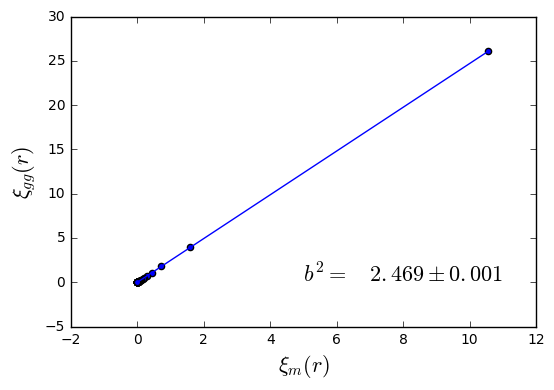

In [198]:
def linear(x,m):
    return x*m
popt, pcov = curve_fit(linear, xi_m[:,1], xi_g[:,1])
perr = np.sqrt(np.diag(pcov))
plt.plot(xi_m[:,1], linear(xi_m[:,1], popt))
plt.scatter(xi_m[:,1], xi_g[:,1])
plt.annotate(r'$b^2 = \quad %0.3f \pm %0.23f$' %(popt, perr), xy = (5,0), size = '16')
plt.xlabel(r'$\xi_{m}(r)$', size = '16')
plt.ylabel(r'$\xi_{gg}(r)$', size = '16')
plt.show()

In [8]:
def shiftedColorMap(cmap, start=0, midpoint=0.5, stop=1.0, name='shiftedcmap'):
    cdict = {'red': [],'green': [],'blue': [],'alpha': []}
    reg_index = np.linspace(start, stop, 257)
    shift_index = np.hstack([np.linspace(0.0, midpoint, 128, endpoint=False), np.linspace(midpoint, 1.0, 129, endpoint=True)])
    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)
        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))
    newcmap = matplotlib.colors.LinearSegmentedColormap(name, cdict)
    plt.register_cmap(cmap=newcmap)

    return newcmap
my_cmap = matplotlib.cm.get_cmap('seismic')
shifted_cmap = shiftedColorMap(my_cmap, midpoint=0.88,  name='shifted')

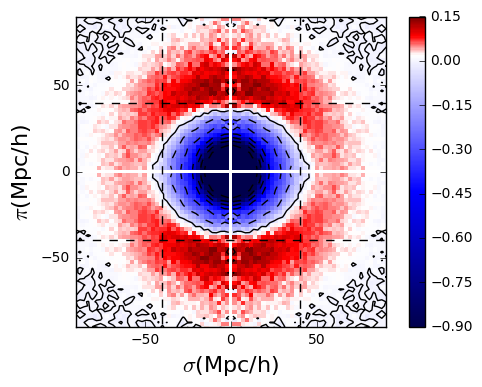

In [9]:
cf_sigmapi = np.loadtxt('/home/icgguest/Desktop/RSD/CCF_new/CCFsigmapi_speczvoids_speczgals.txt')
xi_spi = cf_sigmapi[:,2].reshape((50,50))
x_spi = cf_sigmapi[::50,0]
y_spi = cf_sigmapi[:50,1]
x = np.linspace(-118,118, 100)
y = np.ones((100,1))*40
z = np.ones((100,1))*40
plt.plot(x, y,'r--', color = 'black')
plt.plot(-x, -y,'r--', color = 'black')
plt.plot(z, x, 'r--', color = 'black')
plt.plot(-z, -x, 'r--', color = 'black')
cs = plt.pcolormesh(x_spi ,y_spi ,xi_spi,cmap = shifted_cmap, vmin=-0.9, vmax=0.15) #, norm= LogNorm())
plt.pcolormesh(x_spi ,-y_spi ,xi_spi,cmap = shifted_cmap, vmin=-0.9, vmax=0.15)
plt.pcolormesh(-x_spi ,y_spi ,xi_spi,cmap =shifted_cmap , vmin=-0.9, vmax=0.15)
plt.pcolormesh(-x_spi ,-y_spi ,xi_spi,cmap = shifted_cmap, vmin=-0.9, vmax=0.15)
plt.contour(x_spi, y_spi, xi_spi, 9, colors='k')
plt.contour(x_spi, -y_spi, xi_spi, 9, colors='k')
plt.contour(-x_spi, y_spi, xi_spi, 9, colors='k')
plt.contour(-x_spi, -y_spi, xi_spi, 9, colors='k')
plt.axes().set_aspect('equal', adjustable='box')
plt.colorbar(cs)
plt.xlim(-90, 90)
plt.ylim(-90, 90)
plt.xlabel('$\sigma$(Mpc/h)', size = '16')
plt.ylabel(r'$\pi$(Mpc/h)', size = '16')
plt.show()

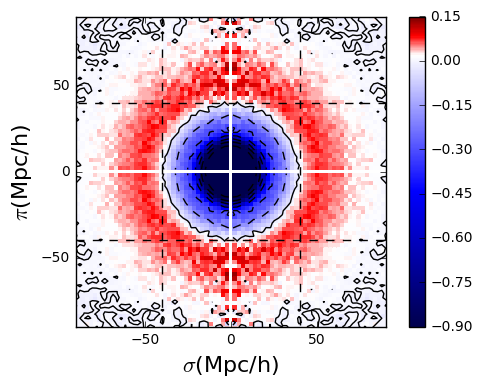

In [10]:
cf_sigmapi = np.loadtxt('/home/icgguest/Desktop/RSD/CCF_new/CCFsigmapi_truevoids_truegals.txt')
xi_spi = cf_sigmapi[:,2].reshape((50,50))
x_spi = cf_sigmapi[::50,0]
y_spi = cf_sigmapi[:50,1]
x = np.linspace(-118,118, 100)
y = np.ones((100,1))*40
z = np.ones((100,1))*40
plt.plot(x, y,'r--', color = 'black')
plt.plot(-x, -y,'r--', color = 'black')
plt.plot(z, x, 'r--', color = 'black')
plt.plot(-z, -x, 'r--', color = 'black')
cs = plt.pcolormesh(x_spi ,y_spi ,xi_spi,cmap = shifted_cmap, vmin=-0.9, vmax=0.15)
plt.pcolormesh(x_spi ,-y_spi ,xi_spi, cmap = shifted_cmap,vmin=-0.9, vmax=0.15)
plt.pcolormesh(-x_spi ,y_spi ,xi_spi,cmap = shifted_cmap, vmin=-0.9, vmax=0.15)
plt.pcolormesh(-x_spi ,-y_spi ,xi_spi,cmap = shifted_cmap, vmin=-0.9, vmax=0.15)
plt.contour(x_spi, y_spi, xi_spi, 9, colors='k')
plt.contour(x_spi, -y_spi, xi_spi, 9, colors='k')
plt.contour(-x_spi, y_spi, xi_spi, 9, colors='k')
plt.contour(-x_spi, -y_spi, xi_spi, 9, colors='k')
plt.axes().set_aspect('equal', adjustable='box')
plt.colorbar(cs)
plt.xlim(-90, 90)
plt.ylim(-90, 90)
plt.xlabel('$\sigma$(Mpc/h)', size = '16')
plt.ylabel(r'$\pi$(Mpc/h)', size = '16')
plt.show()

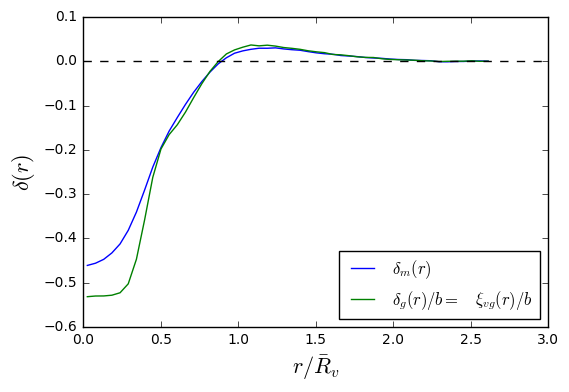

In [11]:
delta_m = np.load('/home/icgguest/Desktop/RSD/profiles/PP_specz_Voids_all_dm.npy')
delta_g = np.load('/home/icgguest/Desktop/RSD/profiles/PP_speczVoids_all_truedg.npy')
void_cat = np.loadtxt('/home/icgguest/Desktop/RSD/catalogues/Plane_par_specz_Voids_cat.txt')
rvals = delta_m[:,0]
r_rv = rvals/(np.mean(void_cat[:,4]))
y = np.zeros((60,1))
x = np.linspace(0, 3, 60)
bias = 1.881
delta_g = np.mean(delta_g[:,1:], axis = 1)
delta_m = np.mean(delta_m[:,1:], axis = 1)
plt.plot(r_rv, delta_m, color = 'blue', label = r'$\delta_{m}(r)$')
plt.plot(r_rv, delta_g/bias, color = 'green', label = r'$\delta_{g}(r)/b  = \quad \xi_{vg}(r)/b$')
plt.plot(x, y,'r--', color = 'black')
plt.legend(loc = 4)
plt.xlabel(r'$r/\bar{R}_{v}$', size = '16')
plt.ylabel(r'$\delta(r)$', size = '16')
plt.show()